# Aufgabe 3

## Datasets

- **sp500_companies.csv**: Enthält Informationen über Unternehmen, die im S&P 500 gelistet sind, einschliesslich Börse, Symbols, Namen (Kurz- und Langbezeichnung), Sektors, Branche,  Kurses,  Marktkapitalisierung, EBITDA, Umsatzwachstums, Standorts, Anzahl der Vollzeitbeschäftigten, Zusammenfassung ihrer Geschäftstätigkeit und Gewichtung im Index.

- **sp500_index.csv**:** Verfolgt die tägliche Performance des S&P 500 Index, wobei jede Zeile ein Datum und den entsprechenden Indexwert an diesem Datum darstellt.

- **sp500_stocks.csv**: Enthält detaillierte Daten zur Aktienperformance der Unternehmen im S&P 500, einschliesslich des bereinigten Schlusskurses, des Schlusskurses, des Höchst- und Tiefstkurses, der Eröffnungskurse und des Volumens für jeden Handelstag.

In [1]:
import pandas as pd

# Load the datasets
sp500_index = pd.read_csv('../../Data/sp500_stocks/sp500_index.csv')
sp500_stocks = pd.read_csv('../../Data/sp500_stocks/sp500_stocks.csv')
sp500_companies = pd.read_csv('../../Data/sp500_stocks/sp500_companies.csv')

# Display the first few rows of each dataset to understand their structure
sp500_companies.head(3), sp500_index.head(3), sp500_stocks.head(3)

(  Exchange Symbol              Shortname               Longname  \
 0      NMS   MSFT  Microsoft Corporation  Microsoft Corporation   
 1      NMS   AAPL             Apple Inc.             Apple Inc.   
 2      NMS  GOOGL          Alphabet Inc.          Alphabet Inc.   
 
                    Sector                        Industry  Currentprice  \
 0              Technology       Software - Infrastructure        420.55   
 1              Technology            Consumer Electronics        188.85   
 2  Communication Services  Internet Content & Information        149.00   
 
        Marketcap        Ebitda  Revenuegrowth           City State  \
 0  3124871299072  1.184270e+11          0.176        Redmond    WA   
 1  2916202840064  1.301090e+11          0.021      Cupertino    CA   
 2  1860279861248  1.001720e+11          0.135  Mountain View    CA   
 
          Country  Fulltimeemployees  \
 0  United States           221000.0   
 1  United States           161000.0   
 2  United Sta

# Gegenwarts- und Zukunftswert (Present & Future Value)

In [4]:
# Import necessary libraries for financial calculations and visualizations
import numpy as np
import matplotlib.pyplot as plt

# Define variables for demonstration
future_value = 1000  # Future value of the investment/loan, in currency units
interest_rate = 0.05  # Annual interest rate as a decimal
years = 10  # Number of years until maturity

# Calculate Present Value
present_value = future_value / ((1 + interest_rate) ** years)

# Calculate Future Value for a present value investment
initial_investment = 500  # Initial investment, in currency units
future_value_from_pv = initial_investment * ((1 + interest_rate) ** years)

# Demonstrate the calculation results
print(f'Present Value (PV): {present_value}\nFuture Value (FV): {future_value_from_pv}')

Present Value (PV): 613.9132535407591
Future Value (FV): 814.447313388721


Der Zukunftswert (FV) ist der Wert eines aktuellen Vermögenswertes zu einem zukünftigen Zeitpunkt, basierend auf einem angenommenen Wachstumsrate oder Zinssatz. Diese Berechnung wird verwendet, um den zukünftigen Wert von Investitionen zu schätzen. Im Beispiel haben wir eine anfängliche Investition von 500 Einheiten mit einem jährlichen Zinssatz von 5% über 10 Jahre betrachtet. Der Zukunftswert dieser Investition beträgt ca. 814.45 Einheiten.

Der Gegenwartswert (PV) ist der heutige Wert eines zukünftigen Geldbetrags, der mit einem spezifischen Zinssatz abgezinst wird. Er zeigt, wie viel ein zukünftiger Geldbetrag heute wert ist. Die Berechnung wird häufig verwendet, um die Attraktivität von Investitionen zu beurteilen. Im Beispiel haben wir einen zukünftigen Wert von 1000 Einheiten in 10 Jahren mit einem jährlichen Zinssatz von 5% angenommen. Der Gegenwartswert dieses Betrags beträgt ca. 613.91 Einheiten.

# Zeitwert des Geldes (Time Value of Money)

Der Zeitwert des Geldes (TVM) ist ein grundlegendes Prinzip in der Finanzwelt, das besagt, dass Geld, das heute verfügbar ist, mehr wert ist als derselbe Betrag in der Zukunft, aufgrund seines Potenzials, Erträge zu erzielen. Dieses Konzept wird durch Zinsberechnungen veranschaulicht, einschliesslich einfacher Zinsen und Zinseszinsen.

- Einfacher Zins: Bei der einfachen Verzinsung wird der Zinsbetrag auf den ursprünglichen Kapitalbetrag berechnet, ohne dass Zinsen auf bereits erwirtschaftete Zinsen angerechnet werden. Im Beispiel beträgt der Gesamtbetrag nach 5 Jahren bei einer anfänglichen Investition von 1000 Einheiten und einem jährlichen Zinssatz von 5% etwa 1250 Einheiten.

- Zinseszins: Im Gegensatz dazu berücksichtigt die Zinseszinsberechnung sowohl den ursprünglichen Kapitalbetrag als auch die auf dem Kapitalbetrag im Laufe der Zeit angesammelten Zinsen. Dies führt zu einem höheren Gesamtertrag im Vergleich zur einfachen Verzinsung. In unserem Beispiel beträgt der Gesamtbetrag nach 5 Jahren ca. 1276.28 Einheiten.

In [8]:
# Demonstrate Time Value of Money (TVM) with a simple interest calculation

# Define variables for demonstration
principal_amount = 1000  # Principal amount of the investment/loan, in currency units
annual_interest_rate = 0.05  # Annual interest rate as a decimal
time_period_years = 10  # Time period in years

# Calculate the total amount after the time period with simple interest
total_amount_simple_interest = principal_amount * (1 + annual_interest_rate * time_period_years)

# Calculate the total amount after the time period with compound interest (compounded annually)
total_amount_compound_interest = principal_amount * ((1 + annual_interest_rate) ** time_period_years)

# Display the calculation results
print(f'Einfacher Zins: {total_amount_simple_interest}\nMit Zinseszins: {total_amount_compound_interest}')

Einfacher Zins: 1500.0
Mit Zinseszins: 1628.894626777442


# Korrelation und Kovarianz von Vermögenswerten

In [9]:
# First, let's identify stocks with a substantial amount of data
stock_symbols = sp500_stocks['Symbol'].unique()

# Calculate the number of data points for each stock
stock_data_counts = sp500_stocks['Symbol'].value_counts()

# Identify stocks with the highest number of data points
top_stocks = stock_data_counts.nlargest(5).index.tolist()

# Use the identified top stocks for correlation and covariance calculation
symbol_1, symbol_2 = top_stocks[0], top_stocks[1] # Here you can change the symbol i.e. company

# Filter the stock data for these new symbols
stock_data_1 = sp500_stocks[sp500_stocks['Symbol'] == symbol_1]
stock_data_2 = sp500_stocks[sp500_stocks['Symbol'] == symbol_2]

# Align the data by date
aligned_data = pd.merge(stock_data_1[['Date', 'Close']], stock_data_2[['Date', 'Close']], on='Date', suffixes=(f'_{symbol_1}', f'_{symbol_2}'))

# Calculate returns for aligned data
returns_aligned_1 = aligned_data[f'Close_{symbol_1}'].pct_change().dropna()
returns_aligned_2 = aligned_data[f'Close_{symbol_2}'].pct_change().dropna()

# Recalculate the correlation and covariance
correlation_aligned = returns_aligned_1.corr(returns_aligned_2)
covariance_aligned = returns_aligned_1.cov(returns_aligned_2)

# Display the results along with selected symbols
print(f'Symbol 1: {symbol_1} \nSymbol 2: {symbol_2} \nKorrelation: {correlation_aligned} \nKovarianz: {covariance_aligned}')

Symbol 1: MMM 
Symbol 2: STZ 
Korrelation: 0.38607767484156114 
Kovarianz: 9.997687614455539e-05


Korrelation und Kovarianz sind statistische Masse, die die Beziehung und die Abhängigkeit zwischen zwei Zufallsvariablen oder Datensätzen quantifizieren. In der Finanzwelt werden diese Konzepte verwendet, um zu verstehen, wie sich verschiedene Vermögenswerte zueinander verhalten.

- Korrelation: Misst die Stärke und Richtung einer linearen Beziehung zwischen zwei Vermögenswerten. Der Korrelationskoeffizient kann zwischen -1 und +1 liegen, wobei +1 eine perfekte positive Korrelation, -1 eine perfekte negative Korrelation und 0 keine Korrelation bedeutet. In unserem Beispiel beträgt die Korrelation zwischen den Aktien von MMM und STZ etwa 0.386, was darauf hinweist, dass eine moderate positive Beziehung zwischen ihren Renditen besteht.

- Kovarianz: Misst, inwiefern die Renditen zweier Vermögenswerte gemeinsam variieren. Ein positiver Kovarianzwert bedeutet, dass die Vermögenswerte tendenziell zusammen steigen oder fallen, während ein negativer Wert darauf hinweist, dass sie sich in entgegengesetzte Richtungen bewegen. 


Die Kovarianz zwischen MMM und STZ beträgt ca. 0.0001, was auf eine kleine positive Beziehung hindeutet, obwohl der Wert relativ klein ist.

# Visualisierung von Finanzdaten

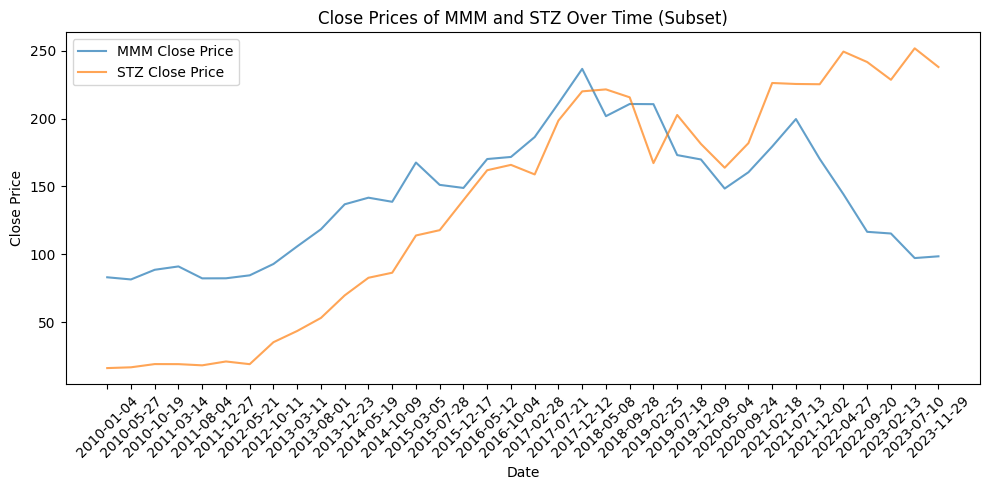

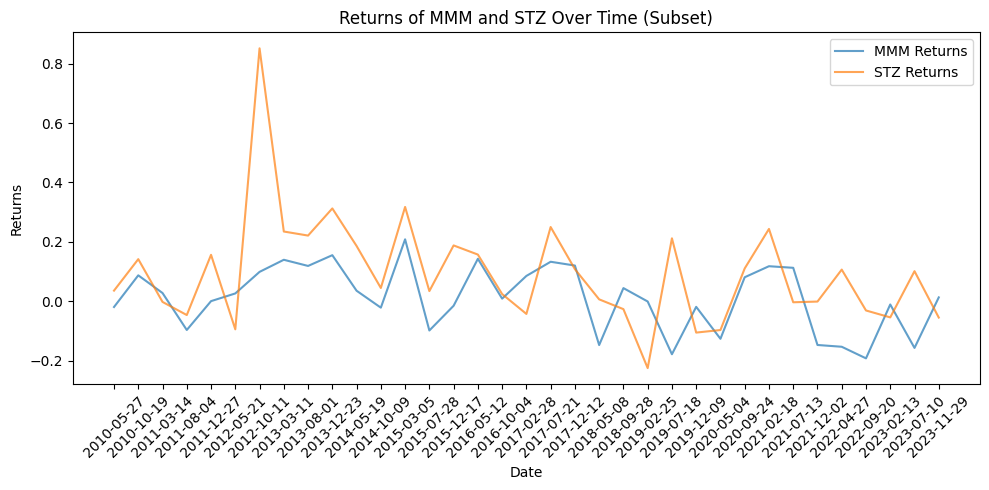

In [10]:
# Plotting the Close prices of MMM and STZ with a subset of data for efficiency
plt.figure(figsize=(10, 5))

# To ensure the plot can be generated within reasonable time, let's use a subset of data
subset_data = aligned_data.iloc[::100]  # Take every 100th row to reduce the data size

plt.plot(subset_data['Date'], subset_data[f'Close_{symbol_1}'], label=f'{symbol_1} Close Price', alpha=0.7)
plt.plot(subset_data['Date'], subset_data[f'Close_{symbol_2}'], label=f'{symbol_2} Close Price', alpha=0.7)

plt.title('Close Prices of MMM and STZ Over Time (Subset)')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting the returns of MMM and STZ with a subset of data for efficiency
plt.figure(figsize=(10, 5))

# Calculate returns for the subset of aligned data
returns_subset_1 = subset_data[f'Close_{symbol_1}'].pct_change().dropna()
returns_subset_2 = subset_data[f'Close_{symbol_2}'].pct_change().dropna()

plt.plot(subset_data['Date'][1:], returns_subset_1, label=f'{symbol_1} Returns', alpha=0.7)
plt.plot(subset_data['Date'][1:], returns_subset_2, label=f'{symbol_2} Returns', alpha=0.7)

plt.title('Returns of MMM and STZ Over Time (Subset)')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

# Übungen

### Übung 1: Berechnung des Gegenwartswerts

Sie haben ein Investitionsangebot, das Ihnen in 5 Jahren 1'500 CHF verspricht. Der aktuelle jährliche Zinssatz beträgt 3%. 
Berechnen Sie den Gegenwartswert dieser zukünftigen Zahlung. Erklären Sie, warum der Gegenwartswert wichtig ist, wenn Sie Investitionsentscheidungen treffen.

In [37]:
# Your code here

### Übung 2: Zukunftswert einer Investition

Angenommen, Sie investieren heute 1'000CHF in ein Sparkonto, das eine jährliche Zinsrate von 4% bietet. Berechnen Sie den Zukunftswert Ihrer Investition nach 10 Jahren sowohl mit einfacher als auch mit Zinseszinsberechnung.

In [38]:
# Your code here

### Übung 3: Zeitwert des Geldes

Sie planen, in einem Jahr ein neues Auto zu kaufen, das heute 20'000CHF kostet. Die erwartete jährliche Inflationsrate beträgt 2%. Wie viel Geld müssen Sie in einem Jahr bereitstellen, um das Auto kaufen zu können?

In [39]:
# Your code here

### Übung 4: Korrelation zwischen Aktien
Verwenden Sie die bereitgestellten Datasets, um die Korrelation zwischen den täglichen Renditen von zwei S&P 500-Aktien Ihrer Wahl zu berechnen. Interpretieren Sie den Korrelationskoeffizienten und diskutieren Sie, wie diese Information bei der Zusammenstellung eines diversifizierten Portfolios nützlich sein könnte.

In [40]:
# Your code here

### Übung 5: Visualisierung der Aktienrenditen
Wählen Sie zwei Aktien aus dem S&P 500-Datensatz aus und visualisieren Sie ihre täglichen Renditen über einen Zeitraum von einem Jahr. Verwenden Sie unterschiedliche Farben für jede Aktie. Analysieren Sie die Visualisierungen und diskutieren Sie, welche Aktie volatiler ist und warum.

In [41]:
# Your code here

### Übung 6: Berechnung der Kovarianz
Berechnen Sie die Kovarianz zwischen den täglichen Renditen der zwei in Übung 5 ausgewählten Aktien. Erklären Sie, was die Kovarianz über die Beziehung zwischen den Renditen der beiden Aktien aussagt.

In [ ]:
# Your code here